# MNIST Digit Classification

Example followed from https://www.tensorflow.org/tutorials/quickstart/beginner.

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [34]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data between 0-1
x_train = x_train / 255.0
x_test = x_test / 255.0

In [35]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


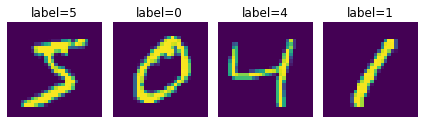

In [36]:
plt.figure()
for i in range(4):
    plt.subplot(1, 4, i + 1)
    plt.imshow(x_train[i])
    plt.axis("off")
    plt.title("label={}".format(y_train[i]))
# plt.suptitle("Example Training Images")
plt.tight_layout()
plt.show()

In [37]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(10))

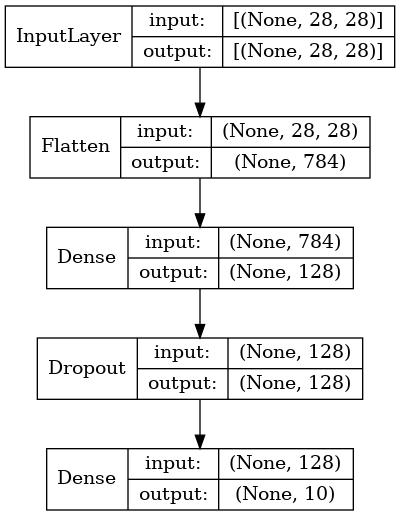

In [38]:
tf.keras.utils.plot_model(model, to_file="/tmp/model.png", show_shapes=True, show_layer_names=False)

In [39]:
# Examine the raw "logit" score of the untrained model for each class
predictions = model(x_train[0:1]).numpy()
predictions

array([[ 0.41995764, -0.09409437,  0.17371677, -0.3849497 , -0.3815487 ,
        -0.12247957,  0.32875034, -0.39647204, -0.07635295,  0.01984133]],
      dtype=float32)

In [40]:
# Convert the "logit" scores into probabilities
tf.nn.softmax(predictions).numpy()

array([[0.15406509, 0.09214129, 0.12043791, 0.06888703, 0.0691217 ,
        0.08956261, 0.140635  , 0.06809784, 0.09379059, 0.1032609 ]],
      dtype=float32)

In [41]:
loss_func = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

loss_func(y_train[0:1], predictions).numpy()

2.4128175

In [42]:
model.compile(optimizer="adam", loss=loss_func, metrics=["accuracy"])
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2922 - accuracy: 0.9141
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1413 - accuracy: 0.9580
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1070 - accuracy: 0.9680
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0890 - accuracy: 0.9721
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0761 - accuracy: 0.9762


In [43]:
model.evaluate(x_train, y_train, verbose=2)

1875/1875 - 1s - loss: 0.0408 - accuracy: 0.9881


[0.04080011323094368, 0.9881333112716675]

In [44]:
model(x_test[0:1])

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[ -7.572148 ,  -4.91553  ,  -0.9868956,   3.8902137, -13.190111 ,
         -5.056116 , -19.640661 ,  11.287831 ,  -5.160134 ,  -1.932582 ]],
      dtype=float32)>

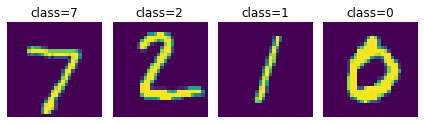

In [45]:
plt.figure()
for i in range(4):
    plt.subplot(1, 4, i + 1)
    plt.imshow(x_test[i])
    plt.axis("off")
    classification = np.argmax(model(x_test[i:i+1]))
    plt.title("class={}".format(classification))
# plt.suptitle("Example Test Images")
plt.tight_layout()
plt.show()